In [ ]:
!pip install mlxtend==0.21.0
!pip install matplotlib==3.5.3

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats

<Axes: >

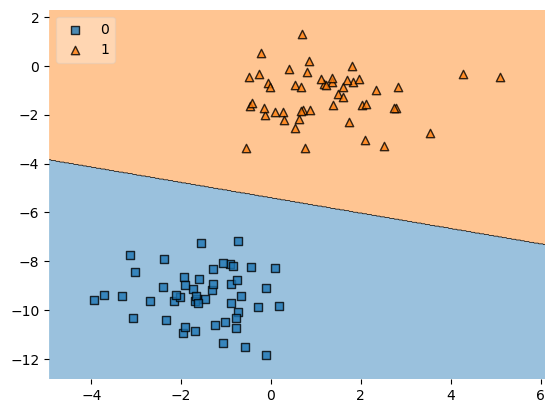

In [10]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.0, random_state=2)

lr = LogisticRegression(solver='lbfgs', random_state=2)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr, legend=2)


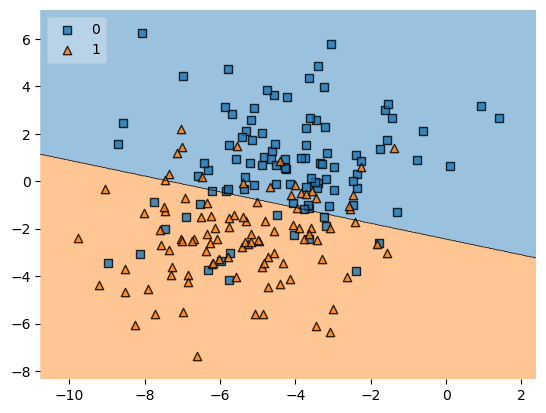

In [11]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=2.0, random_state = 225)

lr = LogisticRegression(solver='lbfgs', random_state=4)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr, legend=2)
plt.show()

In [12]:
# Load the dataset
breast_cancer = load_breast_cancer()

# Select 50 samples and two features (for simplicity)
data_df = pd.DataFrame(breast_cancer.data[25:75], columns=breast_cancer.feature_names)
data_df = data_df[['mean radius', 'mean compactness']]
target_df = pd.DataFrame(breast_cancer.target[25:75])
target_df.columns = ['benign']

# Get the min and max on the x-axis for plotting lines later
minX = data_df['mean radius'].min()
maxX = data_df['mean radius'].max()

print(data_df.head())
print(target_df.head())

   mean radius  mean compactness
0        17.14            0.2276
1        14.58            0.1868
2        18.61            0.1066
3        15.30            0.1697
4        17.57            0.1157
   benign
0       0
1       0
2       0
3       0
4       0


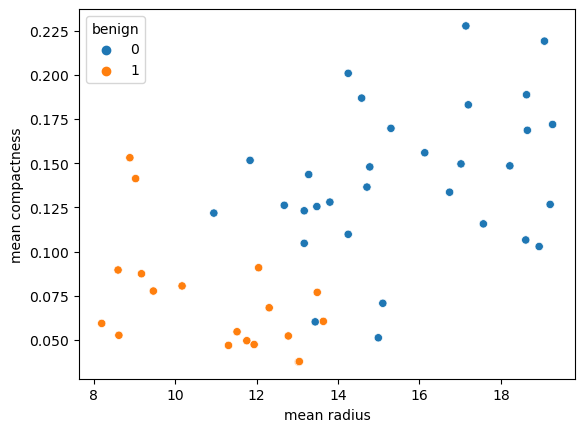

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
plt.show()

In [14]:
def drawLine(plt, m, c, min, max):
  x = np.linspace(min, max)
  y = m * x + c
  plt.plot(x, y, 'g-')

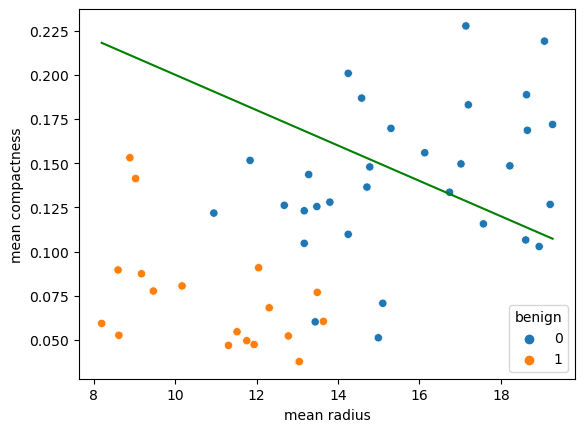

In [15]:
sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
# Draw a line at some arbitrary place
drawLine(plt, -0.01, 0.3, minX, maxX)
plt.show()

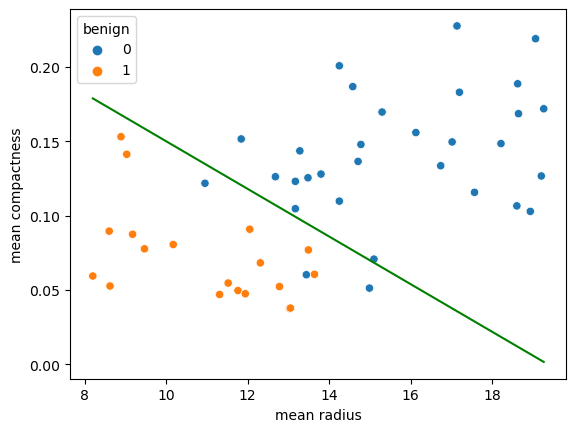

In [22]:
sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
drawLine(plt, -0.016, 0.31, minX, maxX)
plt.show()

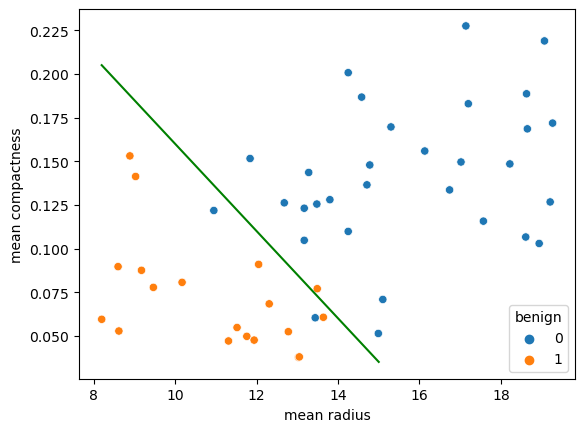

In [23]:
sns.scatterplot(x = 'mean radius', y = 'mean compactness', data = data_df, hue=target_df['benign'])
drawLine(plt, -0.025, 0.41, minX, 15)
plt.show()

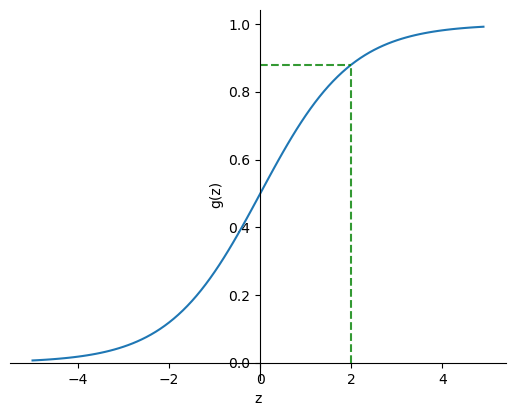

In [24]:
z = np.arange(-5, 5, 0.1)
g = 1 / (1 + np.exp(-z))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(z, g)
plt.plot([2, 2], [0, (1/(1 + np.exp(-2)))], 'g--', alpha = 0.8)
plt.plot([0, 2], [(1/(1 + np.exp(-2))), (1/(1 + np.exp(-2)))], 'g--', alpha = 0.8)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

In [25]:
# `z` is a vector of real numbers
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)

In [26]:
x1 = [1, 0.4, 1.3]
theta = [0.1, -1.2, 0.3]
sample1 = predict(x1, theta)

print('For sample 1: ', sample1)

x2 = [1, 0.1, 0.002]
sample2 = predict(x2, theta)

print('For sample 2: ', sample2)

For sample 1:  0.5024999791668749
For sample 2:  0.49515015210644203


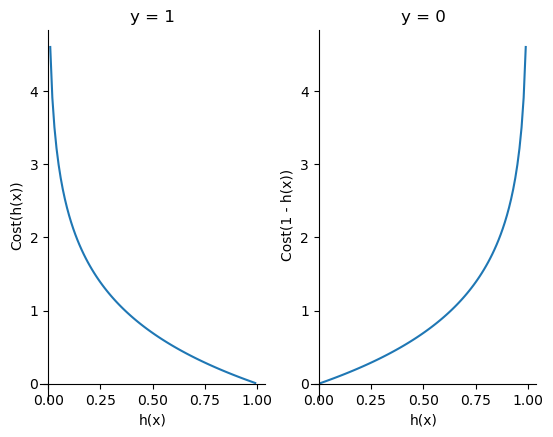

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.arange(0.01, 1, 0.01)
g = -np.log(z)
ax1.spines['left'].set_position(('data', 0.0))
ax1.spines['bottom'].set_position(('data', 0.0))
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.plot(z, g)
ax1.set(xlabel='h(x)', ylabel='Cost(h(x))')
ax1.set_title('y = 1')

g = -np.log(1 - z)
ax2.spines['left'].set_position(('data', 0.0))
ax2.spines['bottom'].set_position(('data', 0.0))
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.plot(z, g)
ax2.set(xlabel='h(x)', ylabel='Cost(1 - h(x))')
ax2.set_title('y = 0')

plt.show()

In [28]:

def cost(pred, y):
  return -y * np.log(pred) - (1 - y) * np.log(1 - pred)

# Prediction is close to 0, y = 0 (small error)
y = 0
pred = 0.00001
print("y = 0, pred close to zero: ", cost(pred, y))

# Prediction is close to 1, y = 0 (large error)
pred = 0.99999
print("y = 0, pred close to one: ", cost(pred, y))

y = 1
pred = 0.00001
# Prediction is close to 0, y = 1 (large error)
print("y = 1, pred close to zero: ", cost(pred, y))

# Prediction is close to 1, y = 1 (small error)
pred = 0.99999
print("y = 1, pred close to one: ", cost(pred, y))


y = 0, pred close to zero:  1.0000050000287824e-05
y = 0, pred close to one:  11.51292546497478
y = 1, pred close to zero:  11.512925464970229
y = 1, pred close to one:  1.0000050000287824e-05


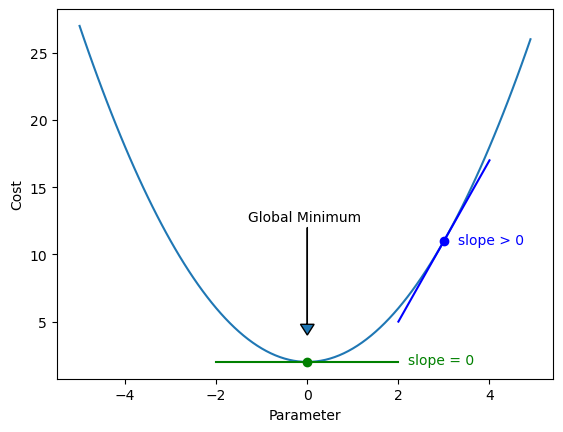

In [29]:
z = np.arange(-5, 5, 0.1)
g = z**2 + 2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(z, g)
plt.plot([0], [2], 'og')
plt.plot([-2, 2], [2, 2], '-g')
plt.arrow(0, 12, 0, -8, length_includes_head=True, head_width=0.3, head_length=0.8)
plt.text(-1.3, 12.5, 'Global Minimum')

plt.text(2.2, 1.8, 'slope = 0', color='g')
plt.plot([3], [11], 'ob')
plt.plot([2, 4], [5, 17], '-b')
plt.text(3.3, 10.8, 'slope > 0', color='b' )
plt.xlabel('Parameter')
plt.ylabel('Cost')
plt.show()

In [30]:

def cost(pred, y):
  return (-y * np.log(pred)) - ((1 - y) * np.log(1 - pred))

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(features, weights):
  z = np.dot(features, weights)
  return sigmoid(z)

# This function is doing the main work of updating the weights in each iteration
def update_theta(features, weights, labels, learning_rate):
  M = len(features)
  predictions = predict(features, weights)
  gradient = np.dot(features.T, predictions - labels)
  gradient /= M   # Calculate gradient average
  gradient *= learning_rate # Multiply by learning rate
  weights -= gradient # Subtract from weights
  return weights


def train(features, labels, weights, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weights = update_theta(features, weights, labels, learning_rate)

        # Calculate error for auditing purposes
        pred = predict(features, weights)

        iter_cost = cost(pred, labels)
        cost_history.append(iter_cost.sum())


    return weights, cost_history
  

In [31]:
# Load the dataset
breast_cancer = load_breast_cancer()

# Select 50 samples and 2 features (for simplicity)
data_df = pd.DataFrame(breast_cancer.data[25:75], columns=breast_cancer.feature_names)
data_df = data_df[['mean radius', 'mean compactness']]
data_df.insert(0, 'coef_1', 1)
target_df = pd.DataFrame(breast_cancer.target[25:75])
target_df.columns = ['benign']

initial_weights = [1.0, 1.0, 1.0]
learning_rate = 0.0005
MAX_ITER= 1000


weights, cost_history = train(data_df.values, target_df['benign'].values, initial_weights, learning_rate, MAX_ITER);

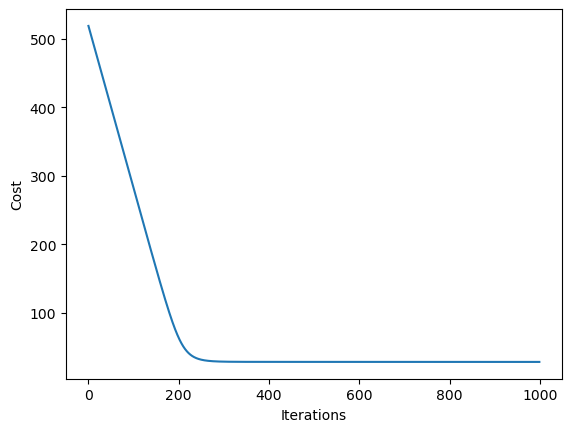

In [32]:
z = np.arange(0, MAX_ITER)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(z, cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [33]:
# Load the dataset
breast_cancer = load_breast_cancer()

data_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_df, breast_cancer.target, random_state=2)

lr = LogisticRegression(solver='lbfgs', penalty=None, random_state=2)
lr.fit(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])


accuracy score: 0.9300699300699301
# of iterations 100


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, random_state=2)
lr.fit(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


accuracy score: 0.958041958041958
# of iterations 1000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=2)
lr.fit(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


accuracy score: 0.9440559440559441
# of iterations 10000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Score on training data:  0.9906103286384976
Score on test data:  0.9440559440559441


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9647887323943662
Score on test data:  0.9370629370629371


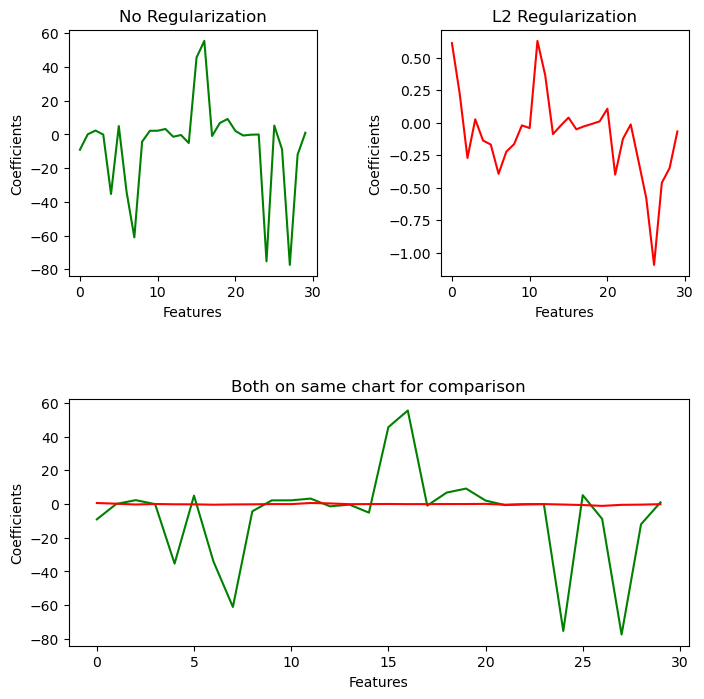

In [41]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.5)


x = np.arange(0, len(lr.coef_[0]),1)
y = lr.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel='Features', ylabel='Coefficients')
ax1.set_title('No Regularization')

y_reg = lr_regularized.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')

ax3.set(xlabel='Features', ylabel='Coefficients')
ax3.set_title('Both on same chart for comparison')
plt.show()

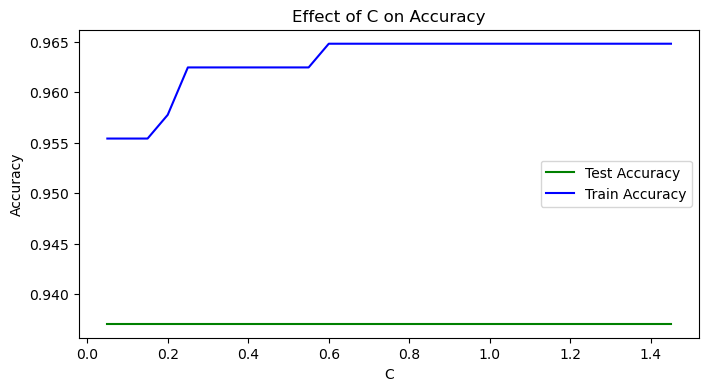

In [42]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df)
data_df_scaled = pd.DataFrame(scaled_data, columns=breast_cancer.feature_names)
data_df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [44]:
X_train, X_test, y_train, y_test = train_test_split(data_df_scaled, breast_cancer.target, random_state=2)
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2', C=0.6, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9859154929577465
Score on test data:  0.9790209790209791


# Assessment: Classification using linear classifiers

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
data = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data"
df = pd.read_csv(data)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Load and prepare the dataset

In [4]:
data_df= df.drop(["name"],axis = 1)

In [16]:
# Separate features and target
xtrain = data_df.drop(['status'], axis = 1)
ytrain = data_df['status']

##  Create the model

In [17]:
# Instantiate a logistic regression classifier with an lbfgs solver and penalty set to none
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, random_state=2)

lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=2)
lr.fit(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

accuracy score: 0.7959183673469388
# of iterations 100


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Instantiate a logistic regression classifier with an lbfgs solver and penalty set to none
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, random_state=2)

lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8698630136986302
Score on test data:  0.7959183673469388


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Instantiate a logistic regression classifier with an lbfgs solver and penalty set to none
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=2)

lr = LogisticRegression(solver='lbfgs', penalty='none',max_iter=10000, random_state=2)
lr.fit(X_train, y_train)
test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8518518518518519
Score on test data:  0.7857142857142857


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


## L2 regularization

In [21]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8518518518518519
Score on test data:  0.8214285714285714


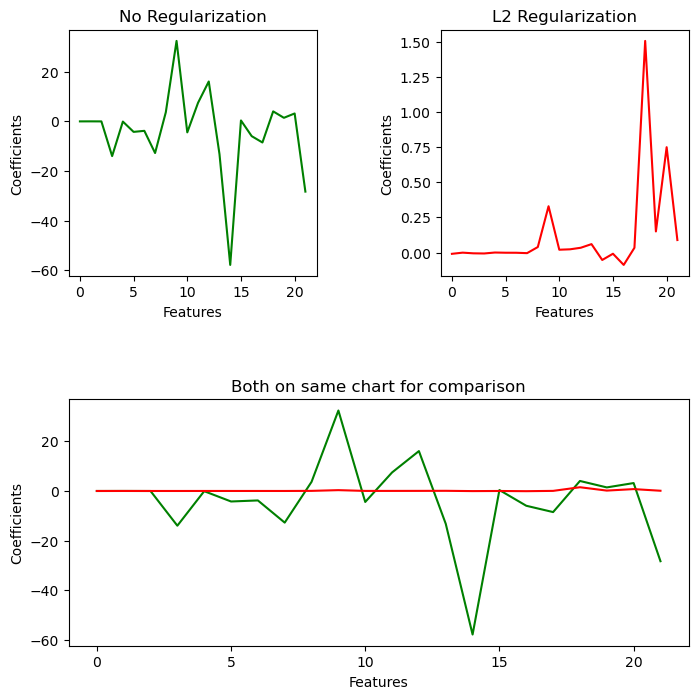

In [22]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.5)


x = np.arange(0, len(lr.coef_[0]),1)
y = lr.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel='Features', ylabel='Coefficients')
ax1.set_title('No Regularization')

y_reg = lr_regularized.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')

ax3.set(xlabel='Features', ylabel='Coefficients')
ax3.set_title('Both on same chart for comparison')
plt.show()

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(xtrain)
data_df_scaled = pd.DataFrame(xtrain, columns=xtrain.columns)
data_df_scaled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [30]:
X_train, X_test, y_train, y_test = train_test_split(xtrain,ytrain, random_state=2)
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2', C=0.6, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.863013698630137
Score on test data:  0.8571428571428571


##  Choose the C parameter

In [42]:
def test_train_score(X_train, X_test, y_train, y_test,c_val):
    lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2', C=c_val, random_state=2)
    lr.fit(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    train_score = lr.score(X_train, y_train)
    return[test_score,train_score]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(xtrain,ytrain, random_state=2)
c_val=.05
while c_val < 1.5:
    print(test_train_score(X_train, X_test, y_train, y_test,c_val))
    c_val += 0.05

[0.8163265306122449, 0.821917808219178]
[0.8163265306122449, 0.8424657534246576]
[0.7755102040816326, 0.8356164383561644]
[0.7755102040816326, 0.8356164383561644]
[0.7959183673469388, 0.8424657534246576]
[0.8163265306122449, 0.8493150684931506]
[0.8163265306122449, 0.8561643835616438]
[0.8163265306122449, 0.8561643835616438]
[0.8367346938775511, 0.8561643835616438]
[0.8367346938775511, 0.8561643835616438]
[0.8571428571428571, 0.8561643835616438]
[0.8571428571428571, 0.863013698630137]
[0.8571428571428571, 0.863013698630137]
[0.8571428571428571, 0.863013698630137]
[0.8571428571428571, 0.863013698630137]
[0.8571428571428571, 0.863013698630137]
[0.8571428571428571, 0.8698630136986302]
[0.8571428571428571, 0.8767123287671232]
[0.8571428571428571, 0.8767123287671232]
[0.8571428571428571, 0.8767123287671232]
[0.8571428571428571, 0.8767123287671232]
[0.8571428571428571, 0.8835616438356164]
[0.8571428571428571, 0.8835616438356164]
[0.8571428571428571, 0.8835616438356164]
[0.8571428571428571, 0